# Data Quality control for high content screenings before EM


  _This Jupyter Notebook belongs to the article : **CLEMSite, a software for automated phenotypic screens using light microscopy and FIB-SEM.** Please, cite the original paper if you make use of anything present in this notebook._

Images are from Hela Kyoto cells tagged with GFP on GalNAc-T2, fluorescent Golgi apparatus on green channel. DAPI staining of nuclei is on blue channel. Cells were transfected with siRNA COPB1 48 hours before imaging. Cells were seeded on 2 ml MatTek dishes in a concentration of 70.000 cells/ml. Cells were imaged using a Leica Confocal SP5.

It is divided into 4 sections :

1) **Data Loading and preprocessing** : Data is loaded using the loadData function and quality controls are applied on the images.

2) **Plot images**: Random images of the full assay are shown. General features are plotted.

3) **Select cells based on features, PCA or tSNE**: Selection of images (Which images where selected to be acquired by EM?) with corresponding names and a folder with individual crops. This can be done by plotting a feature or by other clustering technique like PCA or tSNE

4) **Validate selected cells and save them in a file**

## PART 1 : Data loading and preprocessing

Data for each experiment is saved as the data followed by the suffix “\_automation”. For each experiment data
is stored in two separate folders, one containing all the images of the screening from the selected
cells, and other with suffix “--cp” containing all the images from the pre-scanning of the spots with
additional files containing comma separated values with information about the images.

**Inside the _--cp_ folder**. Image features and metadata is extracted using a CellProfiler Pipeline v 2.2 (in the same folder). The CellProfiler pipeline first segmented the cells and then it extracted features from each identified Golgi region in the green channel. Cell position was identified from the nucleus associated to each cell. The _loadData_ function searches for a folder with "--cp" and looks for the files generated by the pipeline. Information is merged in a unique dataframe that will be used in the notebook as a source of data, a table structure where each column represent a feature and each row a cell found in the images.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
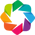

524it [00:09, 54.89it/s]

-- DATA on C:\Users\serra\Desktop\CLEMSite Paper\Latest\clemsite-notebooks\6_feedback_light_microscopy_phenotypes\one_phenotype\data LOADED --


In [1]:
import sys, os
sys.path.append("../")
from validation_pipeline import *

# Folder where the automation data is. The folder should look something like date+_automation
#     - It will merge together all the data tables from Cell Profiler. Be sure that your output folder has the name --cp
#     - It will also generate crops of every cell ready for the plots. 
df = loadData(no_treatments=True, regenerate_crops = True, subfolder ='data')

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from validation_pipeline import plotQC, applyQC
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

### QUALITY CONTROLS

In [3]:
## START FROM HERE IF YOU WANT TO REPEAT THE CONTROLS SECTION
df_qc = df.copy()

In [4]:
df.head()

Metadata_BaseFileName  \
0  image--L0000--S00--U00--V00--J07--E00--O01--X0...   
1  image--L0000--S00--U00--V00--J07--E00--O01--X0...   
2  image--L0000--S00--U00--V00--J07--E00--O01--X0...   
3  image--L0000--S00--U00--V00--J07--E00--O01--X0...   
4  image--L0000--S00--U00--V00--J07--E00--O01--X0...   

                                 FileName_ColorImage  Location_Center_X  \
0  image--L0000--S00--U00--V00--J07--E00--O01--X0...         625.973978   
1  image--L0000--S00--U00--V00--J07--E00--O01--X0...          33.200577   
2  image--L0000--S00--U00--V00--J07--E00--O01--X0...         144.068660   
3  image--L0000--S00--U00--V00--J07--E00--O01--X0...          63.408124   
4  image--L0000--S00--U00--V00--J07--E00--O01--X0...         424.276363   

   Location_Center_Y  Mean_Golgi_AreaShape_Center_X  \
0         343.800743                         620.00   
1         125.072413                          54.50   
2         198.732614                         141.00   
3         213.611495                          59.25   
4         318.223383                         426.50   

   Mean_Golgi_AreaShape_Center_Y  Mean_Nuclei_AreaShape_Solidity  Metadata_U  \
0                          338.5                        0.960759           0   
1                          112.0                        0.957352           0   
2                          197.0                        0.960563           0   
3                          222.5                        0.959281           0   
4                          296.5                        0.959415           0   

   Metadata_V  Metadata_X  ...  ImageQuality_PowerLogLogSlope_Dna  \
0           0           0  ...                          -2.077484   
1           0           0  ...                          -1.700897   
2           0           0  ...                          -1.700897   
3           0           0  ...                          -1.700897   
4           0           0  ...                          -1.700897   

   Intensity_IntegratedIntensity_GolgiBGCorr  Mean_Nuclei_Math_CV  \
0                                 293.550841             0.238129   
1                                 149.563642             0.411079   
2                                 261.350214             0.804955   
3                                 249.222059             0.538432   
4                                 185.264183             0.194579   

   Math_Blobness  Math_Diffuseness  Children_Golgi_Count  \
0       0.847078          0.692007                     2   
1       0.859343          0.697376                     2   
2       0.630102          0.766983                     2   
3       0.781248          0.707491                     4   
4       0.642687          0.740149                     2   

  Mean_MaxAreaGolgi_AreaShape_FormFactor  Gene  \
0                               0.686566   UMO   
1                               0.484985   UMO   
2                               0.660132   UMO   
3                               0.673044   UMO   
4                               0.632589   UMO   

                                            img_path  \
0  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
1  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
2  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
3  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
4  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   

                                        img_name_raw  
0  .\data\crops\image--L0000--S00--U00--V00--J07-...  
1  .\data\crops\image--L0000--S00--U00--V00--J07-...  
2  .\data\crops\image--L0000--S00--U00--V00--J07-...  
3  .\data\crops\image--L0000--S00--U00--V00--J07-...  
4  .\data\crops\image--L0000--S00--U00--V00--J07-...  

[5 rows x 21 columns]

In [12]:
import os
from ipywidgets import widgets, HBox,Label,Button
%gui qt

get_ipython().enable_gui("qt")

bs = Button( description='Show selected',tooltip='Show in viewer',)

In [6]:
# --folder $dfolder 
# dfolder = "\""+ str((os.getcwd()))+"\""

### QUALITY CONTROL 1 : QUALITY OF FOCUS
### Select the lowest number where you still can see a Golgi in focus. (-2.2 to inf)

- **PowerLogLogSlope of DNA**- Removing cells out of focus. Based on metrics from *_M.-A. Bray, A. N. Fraser, T. P. Hasaka, and A. E. Carpenter, “Workflow and Metrics for Image Quality Control in Large-Scale High-Content Screens,” J. Biomol. Screen., vol. 17, no. 2, pp. 266–274, Feb. 2012._*, this feature present on CellProfiler removes potential out of focus cells.  http://cellprofiler.org/manuals/current/MeasureImageQuality.html

Values are  between -2.2 to 100. A common value is -2.2. Values below -2.2 are removed.


### PLOT INSTRUCTIONS

Icons from left to right: 
- 1. Pan
- 2. Zoom
- 3. Select 
- 4. Lazzo select 
- 5. Mouse zoom
- 6. Save plot 
- 7. Reset

Hover over the data point to see the value. 
Alternatively, after selecting several cells, click on **Show selected** to display a visor to observe the image with details. 
The visor has a counter in the right bottom, that can be used with arrow up and arrow down to move over the images.
WARNING: Once you open the visor, if you plan to use it again, do not close it!!

In [13]:
mplot, selection_stream = plotQC(df_qc, "ImageQuality_PowerLogLogSlope_Dna","Focus_Quality", size = 8)

def openVisor(bval):
    images_list = [ df_qc.at[i,'img_name_raw'] for i in selection_stream.index]
    images_values = [ str(df_qc.at[i,'ImageQuality_PowerLogLogSlope_Dna']) for i in selection_stream.index]
    if len(images_list)>0:
        %run -i visorOK.py --listImages $images_list --listIndex $selection_stream.index --listValues $images_values


bs.on_click(openVisor)
display(widgets.HBox([bs]))
mplot

:Layout
   .Scatter.I    :Scatter   [Gene]   (ImageQuality_PowerLogLogSlope_Dna)
   .DynamicMap.I :DynamicMap   []
      :Div

Show :
["['-1.20035266136',", "'-1.26481362664',", "'-1.33904412445']"]
- 55 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X00--Y11--T0000--Z00--colorImage_55.png
- 237 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X01--Y28--T0000--Z00--colorImage_237.png
- 93 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X00--Y23--T0000--Z00--colorImage_93.png


#### TYPE DOWN HERE YOUR RESULT for FOCUS QUALITY:

From the plot, type the MINIMUM that you consider the cell acceptable (is it out of focus?). Normal value: -2.2


In [8]:
### WRITE HERE
from ipywidgets import widgets, HBox,Label
### TYPE DOWN HERE YOUR RESULT for detecting artifacts or apoptosis:
# displaying the text widget
qc_focus_quality = widgets.FloatText(width=300)
hb = HBox([Label('Insert here minimum value for Focus quality:'),qc_focus_quality])
display(hb)

def handle_submit_1(sender):
    print("You selected the value :"+str(qc_focus_quality.value))  
    return

qc_focus_quality.observe(handle_submit_1,'value')

You selected the value :-2.2


In [9]:
df_qc = applyQC(df_qc, "ImageQuality_PowerLogLogSlope_Dna",vmin= qc_focus_quality.value, vmax = -1.2)


QC for ImageQuality_PowerLogLogSlope_Dna
Values applied :[-2.2,-1.2].
Original number of cells:524
After applying control ImageQuality_PowerLogLogSlope_Dna :522
---QC ImageQuality_PowerLogLogSlope_Dna done.


### QUALITY CONTROL 2 : Nuclei coefficient of variation
### Select the highest value where you still can see a cell which is not apoptotic, mitotic cell or an artifact. (0-0.4)

**Mean Nuclei CV** – Coefficient of variation of the intensity. Usually is around 0.4 as maximum. Cells that have more than value are removed.

In [14]:
mplot, selection_stream = plotQC(df_qc, "Mean_Nuclei_Math_CV","Nuclei_Variation")
display(widgets.HBox([bs]))
mplot

:Layout
   .Scatter.I    :Scatter   [Gene]   (Mean_Nuclei_Math_CV)
   .DynamicMap.I :DynamicMap   []
      :Div

Show :
["['-1.52617906481',", "'-1.50301370474',", "'-1.70089669888',", "'-1.57737579347',", "'-1.81772762503',", "'-1.45027730169',", "'-1.50301370474',", "'-1.70837377513',", "'-1.45027730169',", "'-1.50301370474',", "'-1.64284433803',", "'-1.70089669888']"]
- 98 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X00--Y26--T0000--Z00--colorImage_98.png
- 218 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X01--Y20--T0000--Z00--colorImage_218.png
- 7 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X00--Y02--T0000--Z00--colorImage_7.png
- 145 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X01--Y02--T0000--Z00--colorImage_145.png
- 122 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X00--Y31--T0000--Z00--colorImage_122.png
- 475 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X03--Y20--T0000--Z00--colorImage_477.png
- 215 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X01--Y20--T0000--Z00--colorIma

In [15]:
### WRITE HERE
from ipywidgets import widgets, HBox,Label
### TYPE DOWN HERE YOUR RESULT for detecting artifacts or apoptosis:
# displaying the text widget
qc_apo = widgets.FloatText(width=300)
hb = HBox([Label('Insert here value to remove apoptotic shapes:'),qc_apo])
display(hb)
def handle_submit_2(sender):
    print("You selected the value :"+str(qc_apo.value))   
    return

qc_apo.observe(handle_submit_2,'value')

You selected the value :0.5


In [16]:
if qc_apo.value: 
    df_qc = applyQC(df_qc, "Mean_Nuclei_Math_CV",vmax= float(qc_apo.value))

QC for Mean_Nuclei_Math_CV
Values applied :[-inf,0.5].
Original number of cells:522
After applying control Mean_Nuclei_Math_CV :458
---QC Mean_Nuclei_Math_CV done.


### QUALITY CONTROL 3 : REMOVE cells with dimmest signal
### Select the lowest value where you still can see a Golgi (30, inf) 

**Potential Mitotic cells**-  Integrated Intensity of Golgi background. Images which correlation values with the background are very close are removed. Range usually allowed was anything bigger than 30.

In [17]:
plotqc,selection_stream = plotQC(df_qc, "Intensity_IntegratedIntensity_GolgiBGCorr","Background_intensity")
display(widgets.HBox([bs]))
plotqc


:Layout
   .Scatter.I    :Scatter   [Gene]   (Intensity_IntegratedIntensity_GolgiBGCorr)
   .DynamicMap.I :DynamicMap   []
      :Div

In [18]:
### TYPE DOWN HERE YOUR RESULT for remove low background cells:
### WRITE HERE
from ipywidgets import widgets, HBox,Label
qc_bg = widgets.FloatText(width=300)
hb = HBox([Label('Insert here value for low intensity cells:'),qc_bg])
display(hb)
def handle_submit(sender):
    print("You selected the value :"+str(qc_bg.value))   
    return

qc_bg.observe(handle_submit,'value')

You selected the value :30.0


In [19]:
# Allowed range: 30 .. 1e+09 and not NA.
df_qc = applyQC(df_qc, "Intensity_IntegratedIntensity_GolgiBGCorr",vmin= qc_bg.value, vmax = 500)


QC for Intensity_IntegratedIntensity_GolgiBGCorr
Values applied :[30.0,500].
Original number of cells:458
After applying control Intensity_IntegratedIntensity_GolgiBGCorr :438
---QC Intensity_IntegratedIntensity_GolgiBGCorr done.


### END CONTROLS

In [20]:
#APPLY CONTROLS
df = df_qc
print(len(df))

438


----------------

# PART 2 : Plot images and features

In [24]:
%reload_ext autoreload
%autoreload 2
import cv2
import re
from validation_pipeline import findImagesGene
from matplotlib import pyplot as plt

import random
import os

def plot_images(datafolder, df,how_many = 1):
    # For this we have to provide the folder where the data of the prescan is. 
    
    cp_dir = glob.glob(data_folder + "\\*--cp*")[0]
    images_dir = cp_dir + "\\images"
    df = df.reset_index(drop=True)
    samp = random.sample(range(len(df)), how_many)
    total = int(len(samp)/2)+1
    fig = plt.figure(figsize=(20,25))       
    k = 0
    for i in samp:
        mfile = images_dir+'\\'+df.at[i,"FileName_ColorImage"]
        img = cv2.imread(mfile)
        b,g,r = cv2.split(img)       # get b,g,r
        rgb_img = cv2.merge([r,g,b])
        if img is not None:           
                ax = fig.add_subplot(total, 2, k + 1, xticks=[], yticks=[])
                ax.imshow(np.squeeze(rgb_img))
                k = k+1

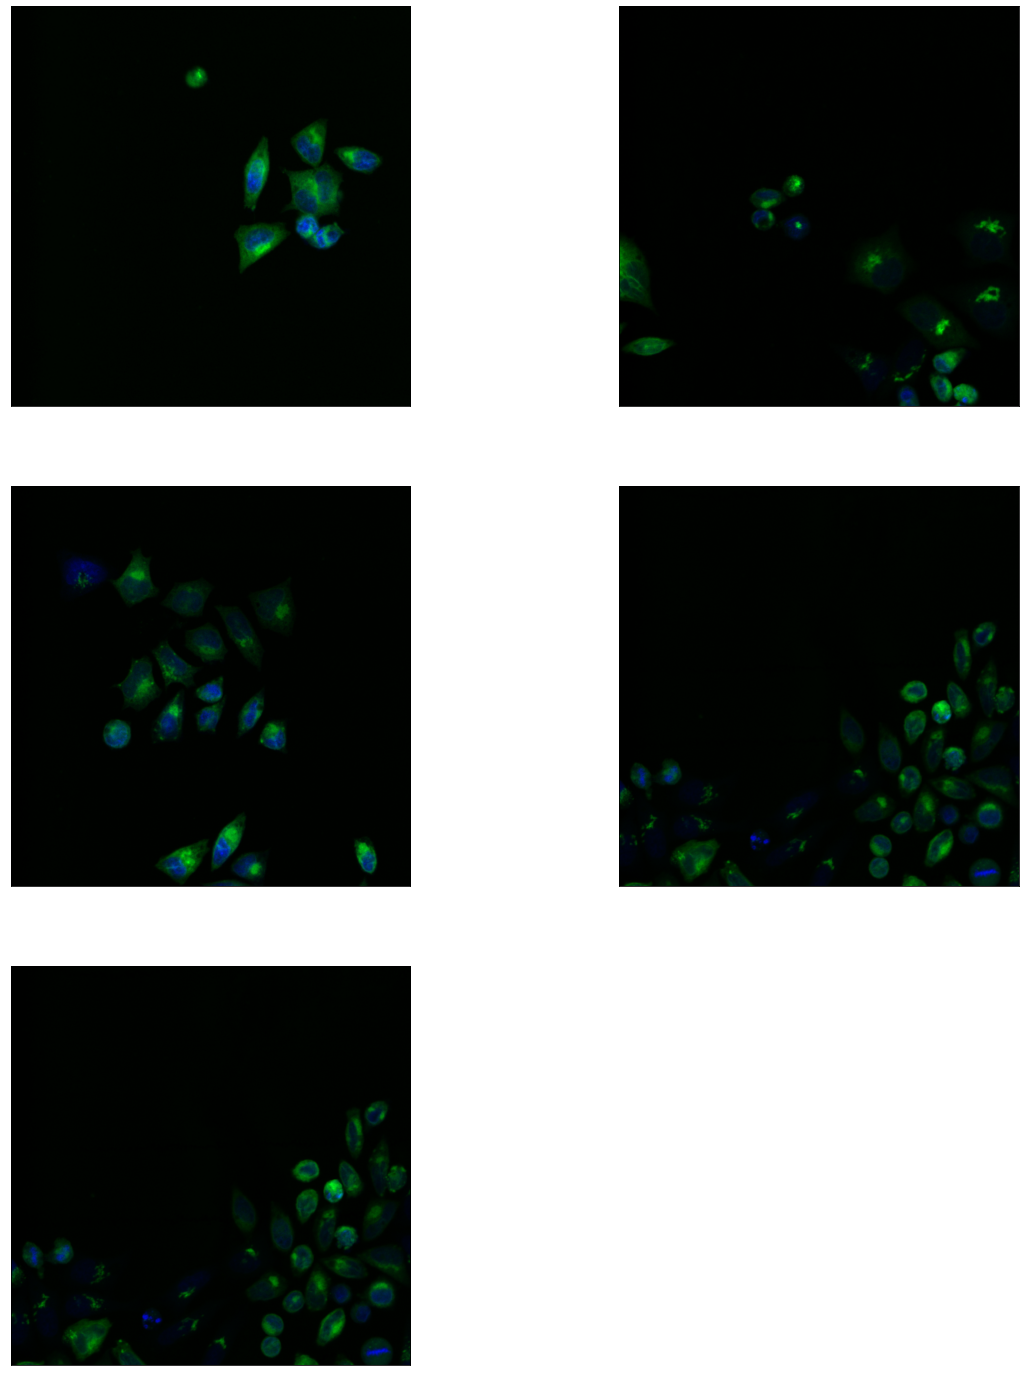

In [25]:
data_folder = os.path.join(os.getcwd(),"data") 
plot_images( data_folder,df,5)

#### PLOT FEATURES
There is a total of 4 features : tubularity, diffusivity, fragmentation and condensation. The idea is that phenotypes show always one extreme difference on one of the features or a mixture of two of them, enough to be differentiated between phenotypes.

From the original data coming from a CellProfiler Pipeline, Blobness corresponds to tubularity, Diffusseness to diffusivity, Children_Golgi_Count to Fragmentation and Mean_MaxAreaGolgi_AreaShape_FormFactor to condensation. 


In [26]:
%reload_ext autoreload
%autoreload 2
#from validation_pipeline import getZscoreAgainstControl
# RENAME of Features and data conditioning needed is done here

# This prepares the data for feature inspection with nicer names
df.loc[:,'Children_Golgi_Count']=df.loc[:,'Children_Golgi_Count'].astype(int)
# Conversion needed because by default is read as an string.

# STEP 1. NORMALIZATION PER GENE against NEGATIVE CONTROL
df_features_gene = df[['Math_Blobness', 'Math_Diffuseness', 'Children_Golgi_Count',
        'Mean_MaxAreaGolgi_AreaShape_FormFactor','Gene','Mean_Nuclei_AreaShape_Solidity']]

df_features_gene_norm = getZscoreAgainstControl(df_features_gene,hue='Gene',control=['UMO'],remove_outliers=True, drop_index = False)
df_features_gene_norm = df_features_gene_norm[['index','Math_Blobness_zscore', 'Math_Diffuseness_zscore', 'Children_Golgi_Count_zscore',
        'Mean_MaxAreaGolgi_AreaShape_FormFactor_zscore','Mean_Nuclei_AreaShape_Solidity_zscore','Gene']]

df_features_gene_norm.columns = ['index',"Tubular","Diffuse","Fragmented","Condensed","Nuc_Solidity","Gene"]
print(len(df_features_gene_norm))
df_features_gene_norm.head(10)

395


index   Tubular   Diffuse  Fragmented  Condensed  Nuc_Solidity Gene
0      0  0.850061  0.272102    0.054986   0.507908      0.628441  UMO
1      1  0.975318  0.305861    0.054986  -0.570144      0.509800  UMO
2      2 -1.237167  0.574779    0.054986   0.219238      0.581611  UMO
3      3  0.158971  0.072776   -0.927582  -0.220352     -0.259676  UMO
4      5  1.136183  0.647918    0.054986   0.776634      0.252005  UMO
5      7  0.888034  0.827420   -0.927582   0.772610      0.148144  UMO
6      8  0.913714  0.120163   -0.927582  -0.596675      0.519708  UMO
7      9 -1.739054  0.744376   -0.927582  -0.525685      0.698439  UMO
8     10 -0.260406  1.104070    0.054986   1.434065      0.400314  UMO
9     11 -0.995204  0.704732    2.020121   0.166343     -0.909211  UMO

#### Execute this

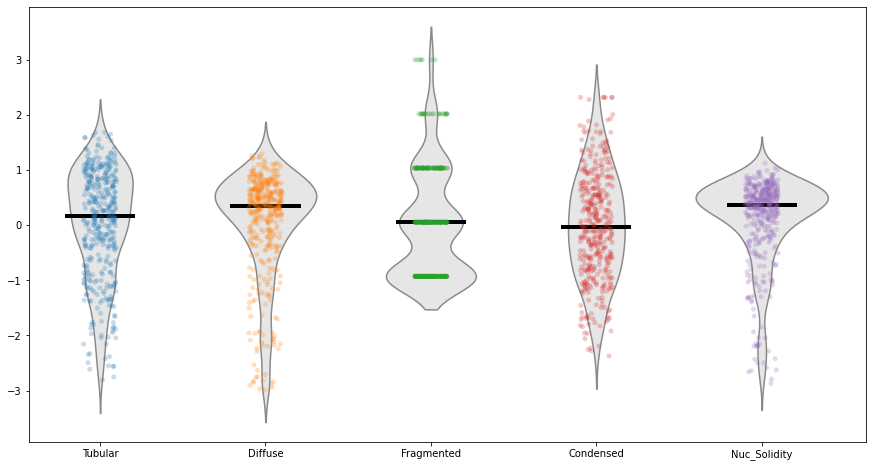

In [27]:
import pylab as Plot
import pandas as pd
import matplotlib.patches as mpatches
import seaborn as sns
from validation_pipeline import nlcmap

def strip_plot_features(iXz, iXz_control,isize=20,columns=["Tubular","Diffuse","Fragmented","Condensed","Nuc_Solidity"],tags=['Phenotype','Control']):
    # sns.set_style("whitegrid")
    Xz = iXz[columns]   
    if iXz_control is not None:
        Xz_control = iXz_control[columns]
        Xz_control = pd.melt(Xz_control)
        Xz = pd.melt(Xz)
        Xz.loc[:,'Type'] = tags[0]
        Xz_control.loc[:,'Type']=tags[1]
        my_df_t = pd.concat([Xz,Xz_control])  
       
        ax = sns.stripplot(x='variable',y='value',hue='Type',edgecolor='black',linewidth=1,data=my_df_t,palette = ["#e74c3c","#3498db"],dodge=True, jitter=0.25, alpha=0.25, size=isize)
        ax.axes.set_xlim(-1, 5)
        classes = tags
        class_colours =  ["#e74c3c","#3498db"]
        recs = []
        for i in range(0, len(class_colours)):
            recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=class_colours[i]))
        Plot.legend(recs, classes, loc=4)
        return ax
    else:
        ax = sns.stripplot(data=Xz, jitter=True, alpha=0.25, size=isize)
        ax = sns.violinplot(data=Xz, inner = None, color = ".9")
    # sns.despine()
    # distance across the "X" or "Y" stripplot column to span, in this case 40%
    median_width = 0.4

    for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"
        median_val = Xz[sample_name].median()
        # plot horizontal lines across the column, centered on the tick
        ax.plot([tick - median_width / 2, tick + median_width / 2], [median_val, median_val],
                lw=4, color='k')

    #Plot.show()
    #Plot.close()
    return ax

def getFeatures(idf_features,gene):
    features_pheno = idf_features.query('Gene==\''+gene+'\'').copy()
    features_pheno = features_pheno[["Tubular","Diffuse","Fragmented","Condensed","Nuc_Solidity"]]
    return features_pheno


features_c = getFeatures(df_features_gene_norm,'UMO')
Plot.rcParams['figure.figsize'] = (15, 8)

fig, ax = plt.subplots() 

ax= strip_plot_features(features_c,None,isize=5,columns=["Tubular","Diffuse","Fragmented","Condensed","Nuc_Solidity"],tags=['UMO'])
Plot.show()


In [28]:
df = df.reset_index(drop=False)
res = df_features_gene_norm.join(df,on='index',rsuffix='_right')
res= res.drop(columns=['index','index_right', 'Gene_right'])
print("Total cells so far:"+str(len(res)))
res.head()

Total cells so far:395


Tubular   Diffuse  Fragmented  Condensed  Nuc_Solidity Gene  \
0  0.850061  0.272102    0.054986   0.507908      0.628441  UMO   
1  0.975318  0.305861    0.054986  -0.570144      0.509800  UMO   
2 -1.237167  0.574779    0.054986   0.219238      0.581611  UMO   
3  0.158971  0.072776   -0.927582  -0.220352     -0.259676  UMO   
4  1.136183  0.647918    0.054986   0.776634      0.252005  UMO   

                               Metadata_BaseFileName  \
0  image--L0000--S00--U00--V00--J07--E00--O01--X0...   
1  image--L0000--S00--U00--V00--J07--E00--O01--X0...   
2  image--L0000--S00--U00--V00--J07--E00--O01--X0...   
3  image--L0000--S00--U00--V00--J07--E00--O01--X0...   
4  image--L0000--S00--U00--V00--J07--E00--O01--X0...   

                                 FileName_ColorImage  Location_Center_X  \
0  image--L0000--S00--U00--V00--J07--E00--O01--X0...         625.973978   
1  image--L0000--S00--U00--V00--J07--E00--O01--X0...          33.200577   
2  image--L0000--S00--U00--V00--J07--E00--O01--X0...         424.276363   
3  image--L0000--S00--U00--V00--J07--E00--O01--X0...         373.185519   
4  image--L0000--S00--U00--V00--J07--E00--O01--X0...         369.042991   

   Location_Center_Y  ...  Metadata_Y  ImageQuality_PowerLogLogSlope_Dna  \
0         343.800743  ...           1                          -2.077484   
1         125.072413  ...           2                          -1.700897   
2         318.223383  ...           2                          -1.700897   
3         373.946368  ...           2                          -1.700897   
4         460.314658  ...           2                          -1.700897   

   Intensity_IntegratedIntensity_GolgiBGCorr  Mean_Nuclei_Math_CV  \
0                                 293.550841             0.238129   
1                                 149.563642             0.411079   
2                                 185.264183             0.194579   
3                                 161.778848             0.175633   
4                                 273.654743             0.244253   

   Math_Blobness  Math_Diffuseness  Children_Golgi_Count  \
0       0.847078          0.692007                     2   
1       0.859343          0.697376                     2   
2       0.642687          0.740149                     2   
3       0.779403          0.660304                     1   
4       0.875096          0.751782                     2   

   Mean_MaxAreaGolgi_AreaShape_FormFactor  \
0                                0.686566   
1                                0.484985   
2                                0.632589   
3                                0.550391   
4                                0.736814   

                                            img_path  \
0  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
1  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
2  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
3  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
4  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   

                                        img_name_raw  
0  .\data\crops\image--L0000--S00--U00--V00--J07-...  
1  .\data\crops\image--L0000--S00--U00--V00--J07-...  
2  .\data\crops\image--L0000--S00--U00--V00--J07-...  
3  .\data\crops\image--L0000--S00--U00--V00--J07-...  
4  .\data\crops\image--L0000--S00--U00--V00--J07-...  

[5 rows x 26 columns]

## Part 3A : Select cells based on features

Same as the plots for control, but this time you are selection a bunch of cells that satisfy a threshold or that you are interested in.

INSTRUCTIONS:
- Save indexes adds the selected cells to your list
- Show selected show selected cells in the visor
- Add random adds N random cells. Useful to select controls
- Clear all indexes, cleans the list of selected cells

In [29]:
# Initialization parameters
cells_random = 200 # how many cells to pick randomly in the plot in the button add random
indexes = set()
cell_final_indexes = set()
feature ='Diffuse'

In [34]:
from validation_pipeline import plotQC
import os
%gui qt


mp, selection_stream = plotQC(res,feature,"diffusion",size=5,jitter =0.4, factor_reduce=0.8)

def openVisor(bval):
    images_list = [ res.at[res.index[i],'img_name_raw'] for i in selection_stream.index]
    images_values = [ str(res.at[res.index[i],feature]) for i in selection_stream.index]
    if len(images_list)>0:
            %run -i visorOk.py --listImages $images_list --listIndex $selection_stream.index --listValues $images_values
            
def save_ind(bval):
    for el in selection_stream.index:
        indexes.add(el)
    print("Indices saved : "+str(indexes))
    return

def save_ind_randomly(bval):
    cells_range = np.min([len(selection_stream.index),cells_random])
    for el in range(cells_range): 
        index_random = random.choice(selection_stream.index)
        indexes.add(index_random)
    print("Indices saved :"+str(indexes))
    return
    
def clear_indexes(bval):
    indexes = set()
    print("All selections cleared.")
    return

b = widgets.Button(
    description='Save indexes',
    disabled=False,
    tooltip='Selection is saved',
)

b2 = widgets.Button(
    description='Show selected',
    disabled=False,
    tooltip='Show in viewer',
)

b3 = widgets.Button(description='Add random',
                    disabled=False, tooltip='Add randomly '+str(cells_random)+' cells from selected region')

b4 = widgets.Button(description='Clear all indexes',
    disabled=False,tooltip='Clear all selections')

b.on_click(save_ind)
b2.on_click(openVisor)
b3.on_click(save_ind_randomly)
b4.on_click(clear_indexes)

display(widgets.HBox([b, b2, b3, b4]))
mp

:Layout
   .Scatter.I    :Scatter   [Gene]   (Diffuse)
   .DynamicMap.I :DynamicMap   []
      :Div

Show :
["['-0.17578639558651216',", "'-0.12264204599539652',", "'0.195082754322636',", "'0.10332808882709615',", "'-0.0165021441834783',", "'-0.1379458361857994',", "'-0.10781928936348784',", "'0.09001822322534277',", "'0.05358322174374272',", "'0.12001865933725407',", "'0.16555100944569642',", "'0.19052921820172536',", "'0.20734733198403693',", "'0.08720858600744534',", "'0.07277565577817367',", "'0.39468264144152004',", "'0.2374075886388162',", "'0.25929693239726204',", "'0.3798092840946701',", "'0.19268489292970867',", "'0.4434848455683377',", "'0.42277579194229015',", "'0.2545458695272615',", "'0.25383651148113984',", "'0.28834877985128154',", "'0.42528129225027567']"]
- 97 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X01--Y02--T0000--Z00--colorImage_137.png
- 107 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X01--Y02--T0000--Z00--colorImage_152.png
- 52 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X00--Y20--T0000--Z00--colorImage_76.p

In [31]:
indexes

{5,
 9,
 17,
 26,
 70,
 77,
 81,
 92,
 114,
 115,
 117,
 120,
 122,
 133,
 135,
 137,
 139,
 153,
 157,
 183,
 186,
 191,
 193,
 200,
 201,
 203,
 233,
 264,
 299,
 302,
 313,
 333,
 340,
 342,
 386,
 388,
 389,
 392,
 393}

In [32]:
cell_final_indexes.update(indexes)

## PART 3B (Optional): Select cells based on tSNE clustering     

Same but this time using tSNE. You can continue adding cells to your previous list.

In [35]:
import os
%gui qt
from validation_pipeline import plotNselect_tSNE
# change perplexity between 30 and 80 to see different cluster distribution
mp, selection_stream = plotNselect_tSNE(res,features=["Tubular","Diffuse","Fragmented","Condensed"], size=4, perplexity = 50)

def openVisor(bval):
    images_list = [ res.at[df.index[i],'img_name_raw'] for i in selection_stream.index]
    images_values = [ str(res.at[res.index[i],feature]) for i in selection_stream.index]
    if len(images_list)>0:
                %run -i visorOk.py --listImages $images_list --listIndex $selection_stream.index --listValues $images_values
def save_ind(bval):
    for el in selection_stream.index:
        indexes.add(el)
    print("Indices saved : "+str(indexes))
    return

def save_ind_randomly(bval):
    cells_range = np.min([len(selection_stream.index),cells_random])
    for el in range(cells_range): 
        index_random = random.choice(selection_stream.index)
        indexes.add(index_random)
        print("Indices saved :"+str(indexes))
        return
    
def clear_indexes(bval):
    indexes = set()
    print("All selections cleared.")
    return

b = widgets.Button(
    description='Save indexes',
    disabled=False,
    tooltip='Selection is saved',
)

b2 = widgets.Button(
    description='Show selected',
    disabled=False,
    tooltip='Show in viewer',
)

b3 = widgets.Button(description='Add random',
                    disabled=False, tooltip='Add randomly '+str(cells_random)+' cells from selected region')

b4 = widgets.Button(description='Clear all indexes',
    disabled=False,tooltip='Clear all selections')

b.on_click(save_ind)
b2.on_click(openVisor)
b3.on_click(save_ind_randomly)
b4.on_click(clear_indexes)

display(widgets.HBox([b, b2, b3, b4]))
mp



Traceback (most recent call last):
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\pyviz_comms\__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\holoviews\plotting\bokeh\callbacks.py", line 158, in on_msg
 raise e
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\holoviews\plotting\bokeh\callbacks.py", line 150, in on_msg
 Stream.trigger(streams)
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\holoviews\streams.py", line 169, in trigger
 subscriber(**dict(union))
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\holoviews\plotting\plot.py", line 239, in refresh
 raise e
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\holoviews\plotting\plot.py", line 235, in refresh
 self._trigger_refresh(stream_key)
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\holoviews\plotting\plot.py", line 251, in _trigger_refresh
 self.update(key)
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\holoviews\plotting\plot.py", line 879, in update
 item = self.__getitem__(key)
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\holoviews\plotting\plot.py", line 440, in __getitem__
 self.update_frame(frame)
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\holoviews\plotting\bokeh\annotation.py", line 412, in update_frame
 text, _, _ = self.get_data(element, ranges, {})
 File "C:\Users\serra\AppData\anaconda3\envs\clemsite_nb\lib\site-packages\holoviews\plotting\bokeh\annotation.py", line 385, in get_data
 return element.data, {}, style
AttributeError: 'NoneType' object has no attribute 'data'

:Layout
   .Scatter.I    :Scatter   [x]   (y)
   .DynamicMap.I :DynamicMap   []
      :Div

Show :
["['-2.5311846810137286',", "'-2.0561882280814237',", "'-2.8868786799356956',", "'-2.904359352432556',", "'-2.8170737675234494',", "'-2.9454641581816015',", "'-2.747913251760273',", "'-1.6547740959932118',", "'-1.1597387868916476',", "'-0.6976191457630262']"]
- 243 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X02--Y20--T0000--Z00--colorImage_323.png
- 208 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X02--Y03--T0000--Z00--colorImage_278.png
- 244 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X02--Y20--T0000--Z00--colorImage_326.png
- 53 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X00--Y20--T0000--Z00--colorImage_78.png
- 327 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X03--Y07--T0000--Z00--colorImage_434.png
- 205 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X02--Y03--T0000--Z00--colorImage_275.png
- 283 : \\data\\crops\\image--L0000--S00--U00--V00--J07--E00--O01--X03--Y02--T0000--Z00

In [36]:
cell_final_indexes.update(indexes)
cell_final_indexes

# PART 4:  Select the number of cells per treatment

 The goal of this part is to select cells of interest. From the previous selection, now it is possible to manually select them one by one.
INSTRUCTIONS:
  - ORANGE means there is another cell less than 200 micrometers in the neighborhood. If that is the case, BY DEFAULT, cells are NOT selected. If you are interested in the cell, click on the top (darker color means selected). If not sure, select the cell, there will be a second iteration of selection later.
  - GREEN is BY DEFAULT selected
  - You always can came back and re-select your cell of interest.
 

In [38]:
inds = list(cell_final_indexes)
final_stage = res.loc[inds,:]

In [39]:
from scipy.spatial import KDTree

def listOfClosest(list_sem, radius = 200):
        """
         Gives back the indices of elements to be removed

        Notice that this method requires some sophistication.
        In this approach we just leave the first element we find.
        :param m_list_px:
        :param m_list_py:
        :param radius:
        :return:
        """
        cp_list = list_sem.copy()
        # for the tree
        ncp_list = list_sem.copy()
        ncp_list_x = list(ncp_list['Location_Center_X'])
        ncp_list_y = list(ncp_list['Location_Center_Y'])
        tree_list = list(zip(ncp_list_x, ncp_list_y))
        list_excluded = []
        for mindex,row in cp_list.iterrows():
            el = np.array((row['Location_Center_X'],row['Location_Center_Y']),dtype=np.float32)
            distances_p, indexes =  KDTree(tree_list).query(el,k=2) # closest element that is not yourself
            if( distances_p[1] < radius):
                list_excluded.append(mindex)
                ncp_list = ncp_list.drop(df.index[[mindex]])
                ncp_list_x = ncp_list['Location_Center_X']
                ncp_list_y = ncp_list['Location_Center_Y']
                tree_list = list(zip(ncp_list_x, ncp_list_y))
                if(len(tree_list)<2):
                    break

        return list_excluded

In [40]:
df_points = final_stage[['Location_Center_X','Location_Center_Y']]
list_ex = listOfClosest(df_points)

In [41]:
from ipywidgets import Button, HBox, VBox, ToggleButton, Layout
def show_selected_cells_excluded(mindexes):
    sel_cells = 3
    items = []
    items2 = []
    boxes = []
    i = 1
    real_indexes = []
    for index in range(len(final_stage)): 
        real_ind = final_stage.index[index]
        real_indexes.append(real_ind)
    real_indexes.sort()    
    
    for real_ind in real_indexes:
        name = final_stage.at[real_ind,'Gene']
        file = open(final_stage.at[real_ind,'img_name_raw'], "rb")
        image = file.read() 
        if real_ind in mindexes:
            items.append(ToggleButton(value = False, button_style='warning',icon='check', description=str(name+"_"+str(real_ind)), tooltip=str(name),layout=Layout(width='300px', height='50px')))
        else:
            items.append(ToggleButton(value = True, button_style='success',icon='check', description=str(name+"_"+str(real_ind)), tooltip=str(name),layout=Layout(width='300px', height='50px')))
        items2.append(widgets.Image(value=image,format='png',layout=Layout(width='300px', height='300px')))
        if i%sel_cells == 0:
            boxes.append(VBox([HBox(items),HBox(items2)]))
            items = []
            items2 =[]
            i = 0
        i = i+1

    return display(VBox(boxes)), boxes

In [42]:
d, boxes = show_selected_cells_excluded(list_ex)
d

In [45]:
def save_selected_cells(boxes):
    print("You selected: ")
    to_save = {}
    for vb in boxes:
        for bSel in vb.children:
            for m_button in bSel.children :
                if m_button.value == True :
                    value = m_button.description
                    data= value.split('_')
                    treatment = data[0]
                    index = int(data[1])
                    if treatment not in to_save.keys():
                        to_save[treatment] = []
                    print(treatment+" "+str(index))
                    to_save[treatment].append(index)
    return to_save

In [46]:
final_saving  = save_selected_cells(boxes)

You selected: 
UMO 5
UMO 77
UMO 81
UMO 114
UMO 115
UMO 133
UMO 137
UMO 186
UMO 191
UMO 193
UMO 208
UMO 233
UMO 244
UMO 389
UMO 392


In [47]:
ind_m  = final_saving['UMO']
final_stage = res.loc[ind_m,:]


### Show images and discard non wanted

This is a final double checking iteration. The cells selected here will go to the high resolution job for feedback microscopy and there will be part of the CLEM experiment.

In [49]:
final = final_stage
print(len(final))
final.head()

15


Tubular   Diffuse  Fragmented  Condensed  Nuc_Solidity Gene  \
5    0.888034  0.827420   -0.927582   0.772610      0.148144  UMO   
77  -0.535547  0.888359    1.037553  -1.962520      0.772418  UMO   
81   0.266562  0.742936    0.054986  -0.948932      0.764199  UMO   
114 -0.259269  0.874689    0.054986  -0.749537     -2.156096  UMO   
115  0.562481  0.804475   -0.927582   0.094222      0.698398  UMO   

                                 Metadata_BaseFileName  \
5    image--L0000--S00--U00--V00--J07--E00--O01--X0...   
77   image--L0000--S00--U00--V00--J07--E00--O01--X0...   
81   image--L0000--S00--U00--V00--J07--E00--O01--X0...   
114  image--L0000--S00--U00--V00--J07--E00--O01--X0...   
115  image--L0000--S00--U00--V00--J07--E00--O01--X0...   

                                   FileName_ColorImage  Location_Center_X  \
5    image--L0000--S00--U00--V00--J07--E00--O01--X0...         318.574164   
77   image--L0000--S00--U00--V00--J07--E00--O01--X0...         244.057902   
81   image--L0000--S00--U00--V00--J07--E00--O01--X0...          33.498972   
114  image--L0000--S00--U00--V00--J07--E00--O01--X0...         132.236052   
115  image--L0000--S00--U00--V00--J07--E00--O01--X0...         440.843131   

     Location_Center_Y  ...  Metadata_Y  ImageQuality_PowerLogLogSlope_Dna  \
5           520.940729  ...           2                          -1.700897   
77          412.315395  ...          30                          -1.700354   
81          548.246401  ...          30                          -1.700354   
114         636.121664  ...           2                          -1.577376   
115         652.307829  ...           2                          -1.577376   

     Intensity_IntegratedIntensity_GolgiBGCorr  Mean_Nuclei_Math_CV  \
5                                   202.786184             0.289104   
77                                  295.991030             0.373202   
81                                  119.551002             0.148299   
114                                 498.852853             0.192774   
115                                 136.998388             0.293986   

     Math_Blobness  Math_Diffuseness  Children_Golgi_Count  \
5         0.850796          0.780332                     1   
77        0.711393          0.790025                     3   
81        0.789939          0.766895                     2   
114       0.738447          0.787850                     2   
115       0.818917          0.776683                     1   

     Mean_MaxAreaGolgi_AreaShape_FormFactor  \
5                                  0.736062   
77                                 0.224629   
81                                 0.414157   
114                                0.451441   
115                                0.609212   

                                              img_path  \
5    C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
77   C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
81   C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
114  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   
115  C:\Users\serra\Desktop\CLEMSite Paper\Latest\c...   

                                          img_name_raw  
5    .\data\crops\image--L0000--S00--U00--V00--J07-...  
77   .\data\crops\image--L0000--S00--U00--V00--J07-...  
81   .\data\crops\image--L0000--S00--U00--V00--J07-...  
114  .\data\crops\image--L0000--S00--U00--V00--J07-...  
115  .\data\crops\image--L0000--S00--U00--V00--J07-...  

[5 rows x 26 columns]

In [50]:
from ipywidgets import Button, HBox, VBox, ToggleButton, Layout
sel_cells = 2
list_cells_ind = []
def on_button_clicked(b):
    print("You selected the gene: "+b.description)
    list_genes.append(b.description)

if len(final)<sel_cells:
    sel_cells = len(final)
items = []
items2 = []
boxes = []
i = 1
for index, row in final.iterrows():       
        label = widgets.Label(value=str(row['Gene']))
        file = open(row["img_name_raw"], "rb")
        image = file.read()
        items.append(ToggleButton(value = True, icon='check', description=str(index), tooltip=(row['Gene']),layout=Layout(width='300px', height='50px')))
        items2.append(widgets.Image(value=image,format='png',layout=Layout(width='300px', height='300px')))
        if i%sel_cells == 0:
            boxes.append(VBox([label,HBox(items),HBox(items2)]))
            items = []
            items2 =[]
            i = 0
        i = i+1

display(VBox(boxes))

### Save cells of interest
Now is time to generate the file that will be used in the microscope to acquire the cells of interest.

In [51]:
print("You selected: ")
to_del = {}
for vb in boxes:
    for ind,b2 in enumerate(vb.children):
        if ind == 0 :
            treatment = b2.value
            if treatment not in to_del.keys():
                to_del[treatment] = []
        if ind == 1 :
            for m_button in b2.children :
                if m_button.value == True :
                    print(treatment+" "+m_button.description)
                    to_del[treatment].append(int(m_button.description))
print('Total of :'+str(len(to_del['UMO'])))

You selected: 
UMO 5
UMO 77
UMO 81
UMO 115
UMO 133
UMO 137
UMO 186
UMO 191
UMO 193
UMO 208
UMO 233
UMO 244
UMO 389
Total of :13


In [52]:
ind_m  = to_del['UMO']
final_stage = res.loc[ind_m,:]

In [53]:
def show_images(df):
    # For this we have to provide the folder where the data of the prescan is. 
    data_folder = os.getcwd()
    images_dir = data_folder 
    df = df.reset_index(drop=True)
    total = int(len(df)/2)+1
    fig = plt.figure(figsize=(30,total*10))       
    k = 0
    for i in range(len(df)):
        mfile = images_dir+'\\'+df.at[i,"img_name_raw"]
        img = cv2.imread(mfile)
        b,g,r = cv2.split(img)       # get b,g,r
        rgb_img = cv2.merge([r,g,b])
        _,tail = os.path.split(mfile)
        cv2.imwrite(".\\cells\\"+tail,rgb_img)
        if img is not None:           
                ax = fig.add_subplot(total, 2, k + 1, xticks=[], yticks=[])
                ax.imshow(np.squeeze(rgb_img))
                k = k+1


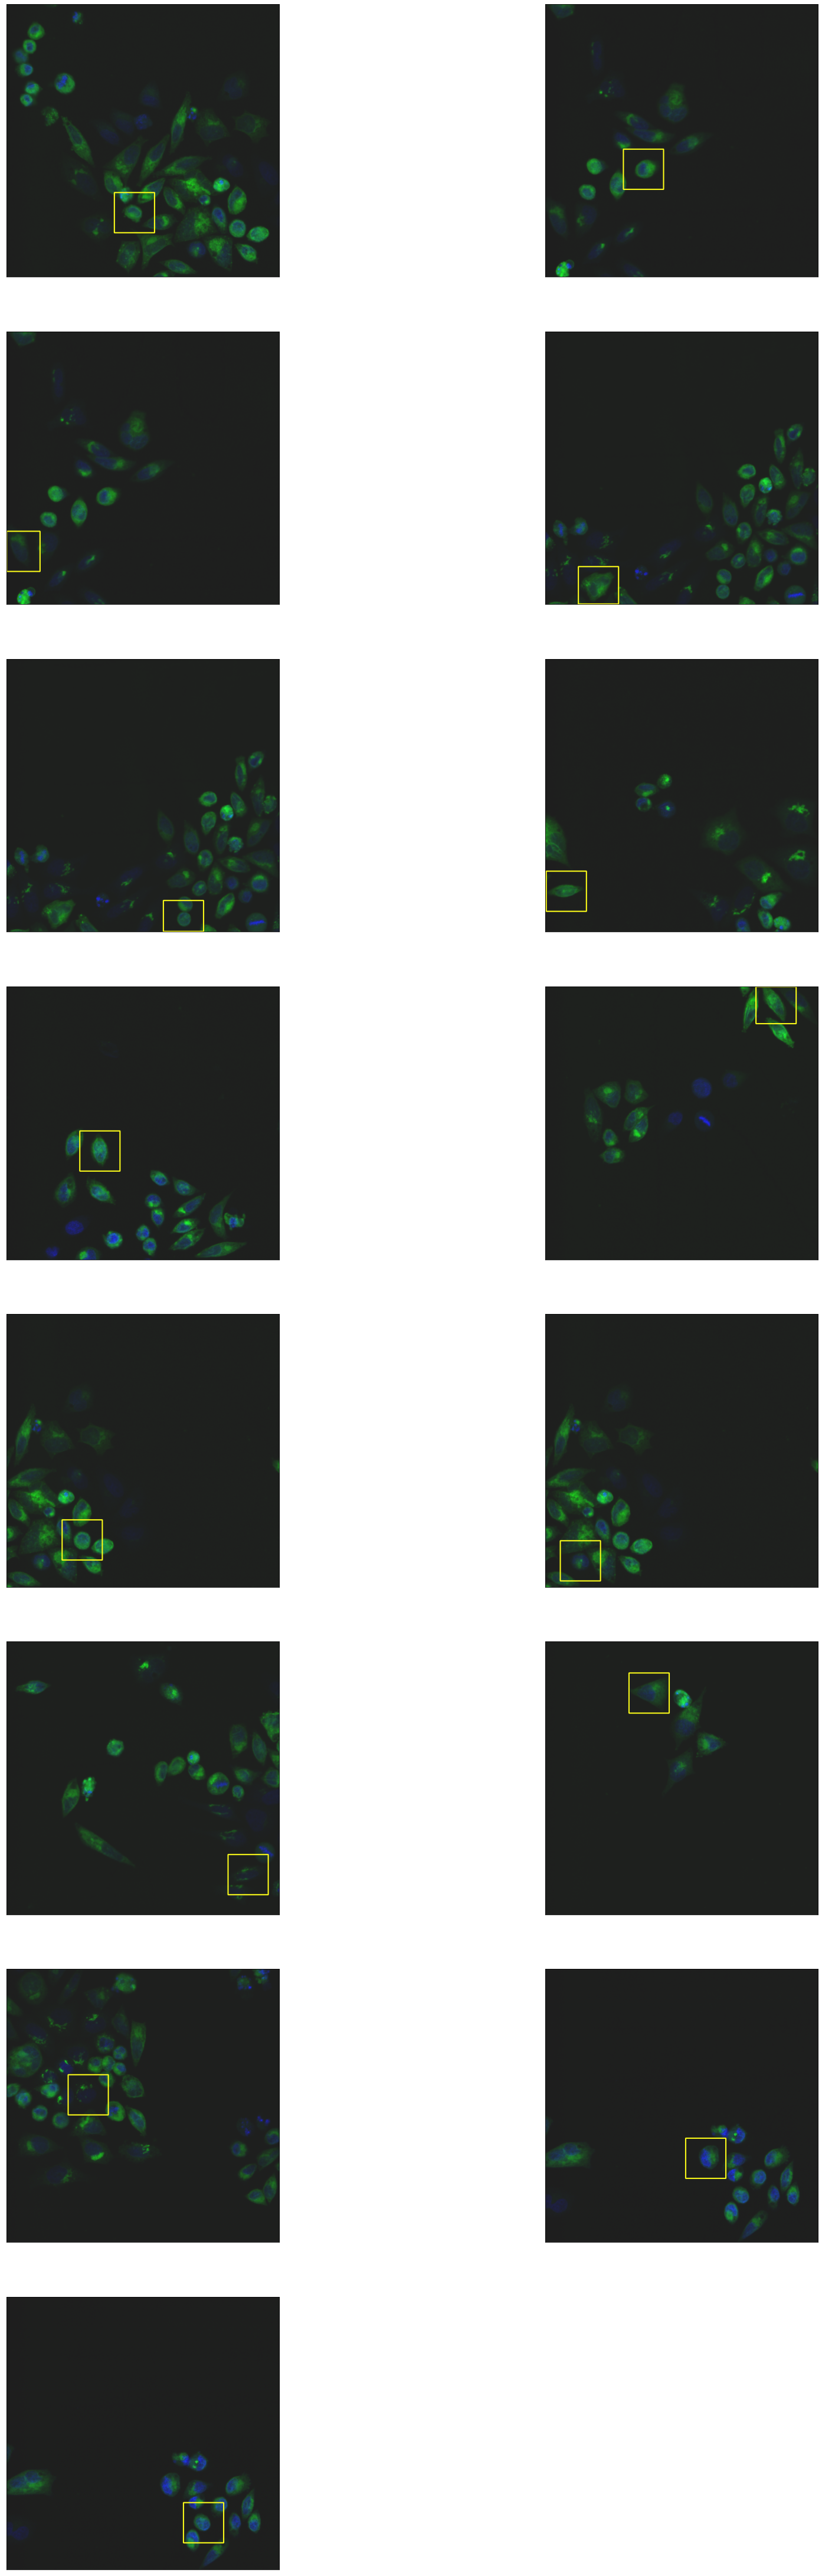

In [54]:
show_images(final)

In [57]:
# Total of selected cells
len(final_stage)

13

In [59]:
from IPython.core.display import HTML

display(HTML(final.to_html()))
#hv.Div(final.to_html())

In [60]:
final_stage.to_csv('selected_cells.csv')

In [61]:
# Pick your file from here
os.getcwd()

'C:\\Users\\serra\\Desktop\\CLEMSite Paper\\Latest\\clemsite-notebooks\\6_feedback_light_microscopy_phenotypes\\one_phenotype'

#### Save in folder
It is advisable to save as .html or PDF/Latex to review later the experiments and which cells where selected.

# END